In [6]:
!conda install -c conda-forge fbprophet -y

Solving environment: done

## Package Plan ##

  environment location: /Users/bez/opt/anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.11.2               |     pyhd8ed1ab_1         1.4 MB  conda-forge
    cctools-927.0.2            |       h5ba7a2e_4         965 KB
    cftime-1.5.0               |   py38h0793694_0         184 KB  conda-forge
    clang-10.0.0               |default_hf57f61e_0        10.0 MB
    clang_osx-64-10.0.0        |       h05bbb7f_0          15 KB
    clangxx_osx-64-10.0.0      |       h05bbb7f_1          22 KB
    compiler-rt-10.0.0         |       h47ead80_0          82 KB
    compiler-rt_osx-64-10.0.0  |       hbcc88fd_0         1.4 MB
    convertdate-2.3.2          |     pyhd8ed1ab_0          37 KB  conda-forge
    ephem-4.0.0.2              |   py38h96a0964_0         711 KB  conda-forge
    fbprophet

In [10]:
!pip install --upgrade plotly

In [41]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import StandardScaler

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet



In [51]:
# importing the datas to the notebook
train = pd.read_csv('../data/train.csv',low_memory=False) #
test = pd.read_csv('../data/test.csv',low_memory=False)
store= pd.read_csv('../data/store.csv',low_memory=False)

In [52]:
train_all = pd.read_csv('../data/train.csv',parse_dates = True, low_memory = False, index_col = 'Date' )

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

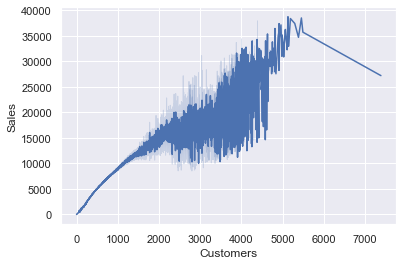

In [53]:
#customer vs sales
a = train_all[train_all.Open ==1]
sns.lineplot(x = 'Customers', y = 'Sales', data=a)

In [56]:
print("In total: ", train.shape)
train.head()

In total:  (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [59]:
train.index

RangeIndex(start=0, stop=1017209, step=1)

In [60]:
# data extraction
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

AttributeError: 'RangeIndex' object has no attribute 'year'